In [1]:
import pandas as pd
import numpy as np

In [9]:
kish = pd.read_csv(r'C:\\Users\Gilad\train\7554\SimpleTest\21.csv')
kish

,X,Y,Pressure,TiltX,TiltY,Time
0,719.415174962467,500.762675,0.321523,-4394.0,1116.0,00:03.8377831
1,720.468414366555,500.867999,0.326650,-4394.0,1116.0,00:03.8534071
2,720.995034068599,500.499365,0.260243,-4394.0,1116.0,00:03.8690233
3,720.415752396351,499.972745,0.270497,-4394.0,1116.0,00:03.8847364
4,718.677907379605,497.866266,0.285389,-4394.0,1116.0,00:03.9003241
...,...,...,...,...,...,...
651,484.384801940178,312.127497,0.207752,-3410.0,2257.0,00:43.2763095
652,484.17415405936,311.916850,0.207752,-3410.0,2257.0,00:43.2920280
653,482.752280863841,311.179582,0.119860,-3410.0,2257.0,00:43.3075650
654,Time Elapsed till drawing started: 00:03.8221499,NaN,NaN,NaN,NaN,NaN


In [10]:
kish.dropna(axis = 0, inplace = True)

In [11]:
kish.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 0 to 653
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          654 non-null    object 
 1    Y         654 non-null    float64
 2    Pressure  654 non-null    float64
 3    TiltX     654 non-null    float64
 4    TiltY     654 non-null    float64
 5    Time      654 non-null    object 
dtypes: float64(4), object(2)
memory usage: 35.8+ KB


In [12]:
kish.columns

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')

In [13]:
kish.columns = kish.columns.str.replace(' ','')

In [14]:
kish.columns

Index(['X', 'Y', 'Pressure', 'TiltX', 'TiltY', 'Time'], dtype='object')

In [19]:
kish[['min', 'sec']] = kish.Time.str.split(':',expand = True)

In [21]:
kish.drop('Time', axis = 1, inplace = True)

In [25]:
kish[['min', 'sec']] = kish[['min', 'sec']].astype('float64', )

In [29]:
kish.sec = kish['sec'] + kish['min'] * 60.0

In [31]:
kish.drop('min', axis = 1, inplace = True)

In [32]:
kish.X = kish.X.astype('float64')

In [33]:
kish.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 0 to 653
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         654 non-null    float64
 1   Y         654 non-null    float64
 2   Pressure  654 non-null    float64
 3   TiltX     654 non-null    float64
 4   TiltY     654 non-null    float64
 5   sec       654 non-null    float64
dtypes: float64(6)
memory usage: 35.8 KB


In [34]:
kish['s_X'] = kish.X.shift()

In [35]:
kish['s_Y'] = kish.Y.shift()

In [36]:
kish['s_sec'] = kish.sec.shift()

In [37]:
kish.s_sec = abs(kish.sec - kish.s_sec)

<AxesSubplot:>

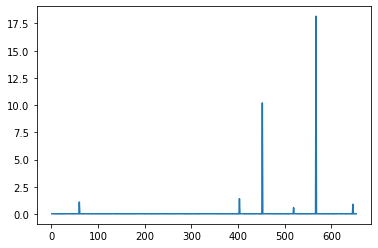

In [38]:
kish.s_sec.plot()

In [40]:
lines = kish[kish['s_sec'] > 0.1]
lines

,X,Y,Pressure,TiltX,TiltY,sec,s_X,s_Y,s_sec
60,761.755399,481.435732,0.190661,-5042.0,2440.0,5.598896,570.539785,402.706086,1.093955
403,727.893752,509.188590,0.030503,-3958.0,1625.0,10.720107,580.071602,405.971128,1.402136
452,333.929553,353.098510,0.028061,-3227.0,2362.0,21.443736,777.132694,486.701929,10.200283
519,347.726989,416.661508,0.189441,-3355.0,2041.0,22.803021,371.477538,440.517381,0.578127
567,508.398660,306.124033,0.103502,-3586.0,2533.0,41.484234,335.351426,414.871001,18.165692
646,483.384225,314.602610,0.198962,-3410.0,2257.0,43.211846,502.395196,309.652385,0.888772


In [42]:
print('So, the pen was lifted',len(kish[kish['s_sec'] > 0.1]),'times' )
print('And, there were',len(kish[kish['s_sec'] > 0.1])+1, 'lines drawn')

So, the pen was lifted 6 times
And, there were 7 lines drawn


In [43]:
pavg = []
for i in range(len(lines.index)):
    t = []
    if (i > 0):
        n = lines.index[i-1]
    else:
        n = 0
    for r in range(n, lines.index[i]):
        t.append(kish.Pressure[r])
    pavg.append(sum(t) / len(t))
t = []
for r in range(lines.index[-1] , len(kish)-1):
    t.append(kish.Pressure[r])
pavg.append(sum(t) / len(t))

In [44]:
pavg

[0.4477739627162615,
 0.6683807960404599,
 0.35802492248464596,
 0.3743819229638399,
 0.3660181586941083,
 0.366358876511266,
 0.20367088701043828]

In [45]:
leng = []
for i in range(len(lines.index)):
    t = []
    if (i > 0):
        n = lines.index[i-1]
    else:
        n = 0
    for r in range(n, lines.index[i]):
        if (r == n):
            t.append(0)
        else:
            dist = np.sqrt( (kish.X[r] - kish.X[r-1])**2 + (kish.Y[r] - kish.Y[r-1])**2 )
            t.append(dist)
    leng.append(sum(t))
t = []
for r in range(lines.index[-1] , len(kish)-1):
    if (r == lines.index[-1]):
            t.append(0)
    else:
        dist = np.sqrt( (kish.X[r] - kish.X[r-1])**2 + (kish.Y[r] - kish.Y[r-1])**2 )
        t.append(dist)
leng.append(sum(t))

In [46]:
leng

[183.040752025522,
 915.507893545692,
 56.68284615115267,
 100.57252137820893,
 92.41002662246035,
 203.5614408781861,
 3.409563332070532]